# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [73]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import pandas as pd
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [74]:
data = pd.read_csv('Guns incident Data.csv')
data.head()

,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police involvement
0,1,2017,1,06-01-2017,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,100,Home,0
1,2,2017,1,19-01-2017,Suicide,Some college,Female,22.0,White,100,Street,0
2,3,2017,1,01-01-2017,Suicide,Bachelors,Male,61.0,White,100,Other specified,0
3,4,2017,2,06-02-2017,Suicide,Bachelors,Male,65.0,White,100,Home,0
4,5,2017,2,09-02-2017,Suicide,High School,Male,32.0,White,100,Other specified,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [75]:
# 1. Memahami struktur data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   S.No.               100798 non-null  int64  
 1   Year                100798 non-null  int64  
 2   Month               100798 non-null  int64  
 3   Date                100798 non-null  object 
 4   Reason              100798 non-null  object 
 5   Education           99376 non-null   object 
 6   Sex                 100798 non-null  object 
 7   Age                 100780 non-null  float64
 8   Race                100798 non-null  object 
 9   Hispanic            100798 non-null  int64  
 10  Place of incident   99414 non-null   object 
 11  Police involvement  100798 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


,S.No.,Year,Month,Age,Hispanic,Police involvement
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100798.000000
mean,50399.500000,2018.000357,6.567601,44.857601,114.179607,0.013909
std,29098.020554,0.816278,3.405609,19.496181,61.595734,0.117114
min,1.000000,2017.000000,1.000000,1.000000,100.000000,0.000000
25%,25200.250000,2017.000000,4.000000,28.000000,100.000000,0.000000
50%,50399.500000,2018.000000,7.000000,43.000000,100.000000,0.000000
75%,75598.750000,2019.000000,9.000000,59.000000,100.000000,0.000000
max,100798.000000,2019.000000,12.000000,108.000000,998.000000,1.000000


In [76]:
# 2. Menangani data yang hilang
data.isnull().sum()

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Education'].fillna(data['Education'].mode()[0], inplace=True)
data['Place of incident'].fillna(data['Place of incident'].mode()[0], inplace=True)

data.isnull().sum()

<ipython-input-76-6c34802361b6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-76-6c34802361b6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,0
S.No.,0
Year,0
Month,0
Date,0
Reason,0
Education,0
Sex,0
Age,0
Race,0
Hispanic,0


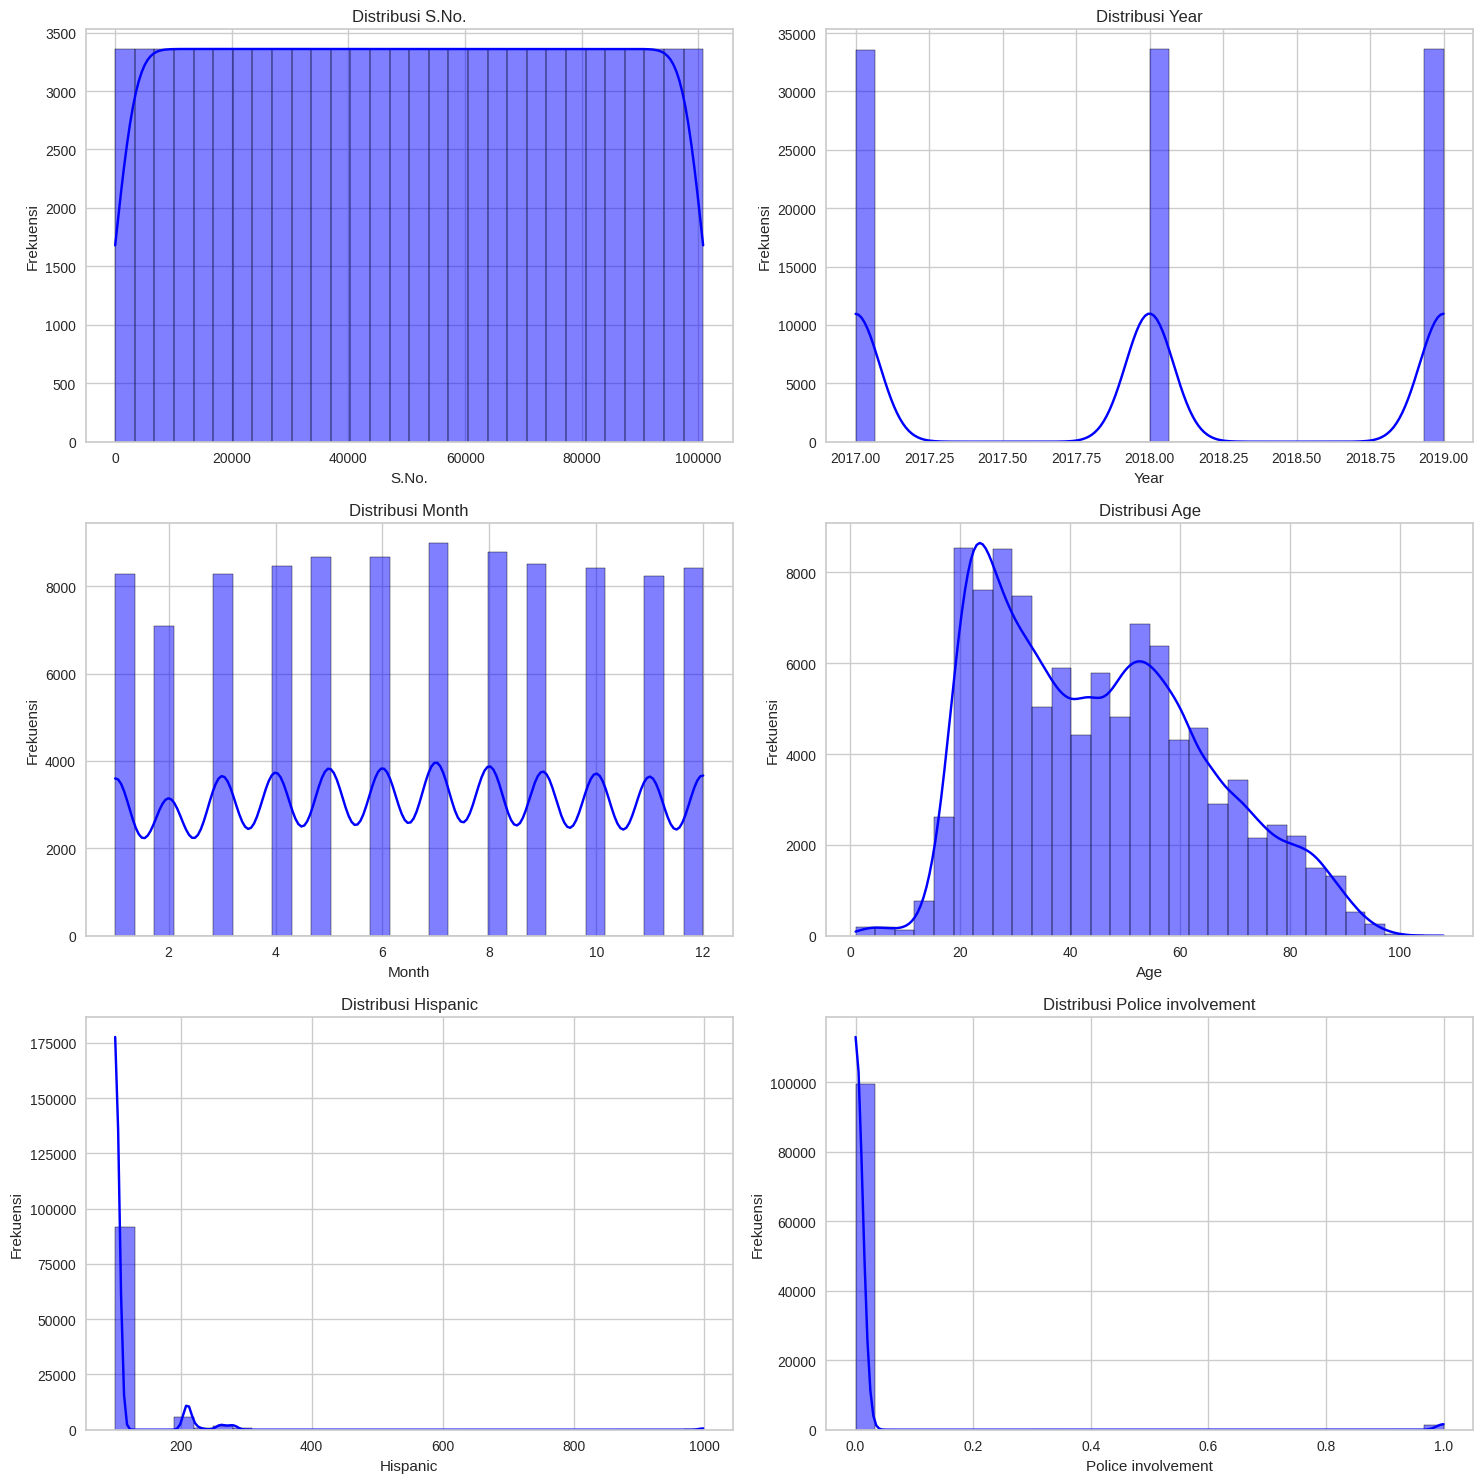

In [77]:
# 3. Analisis distribusi dan korelasi

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = 2
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plot setiap histogram
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, color='blue', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


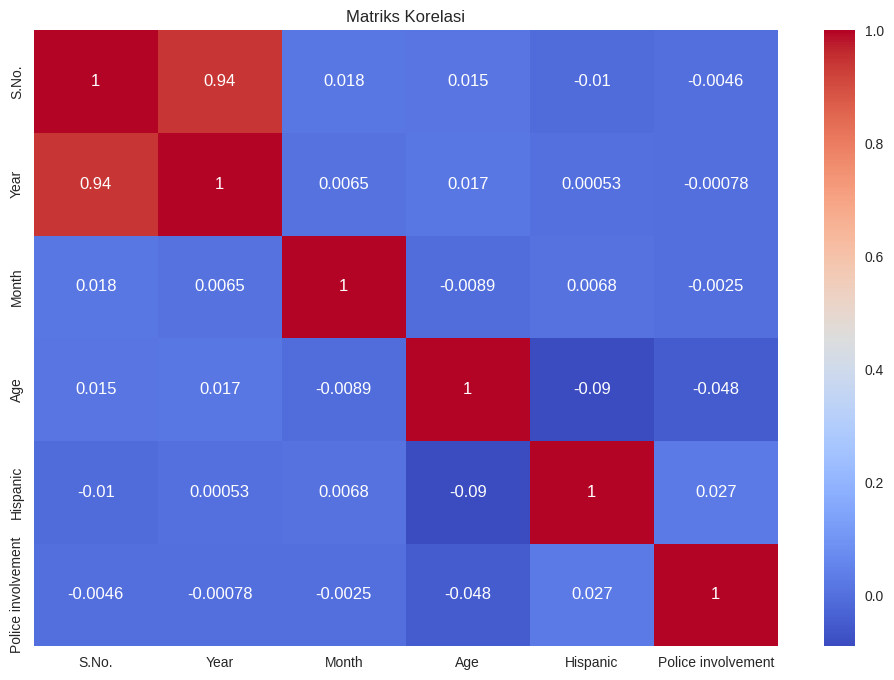

In [78]:
numeric_data = data.select_dtypes(include=[np.number])  # Memilih hanya kolom numerik
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

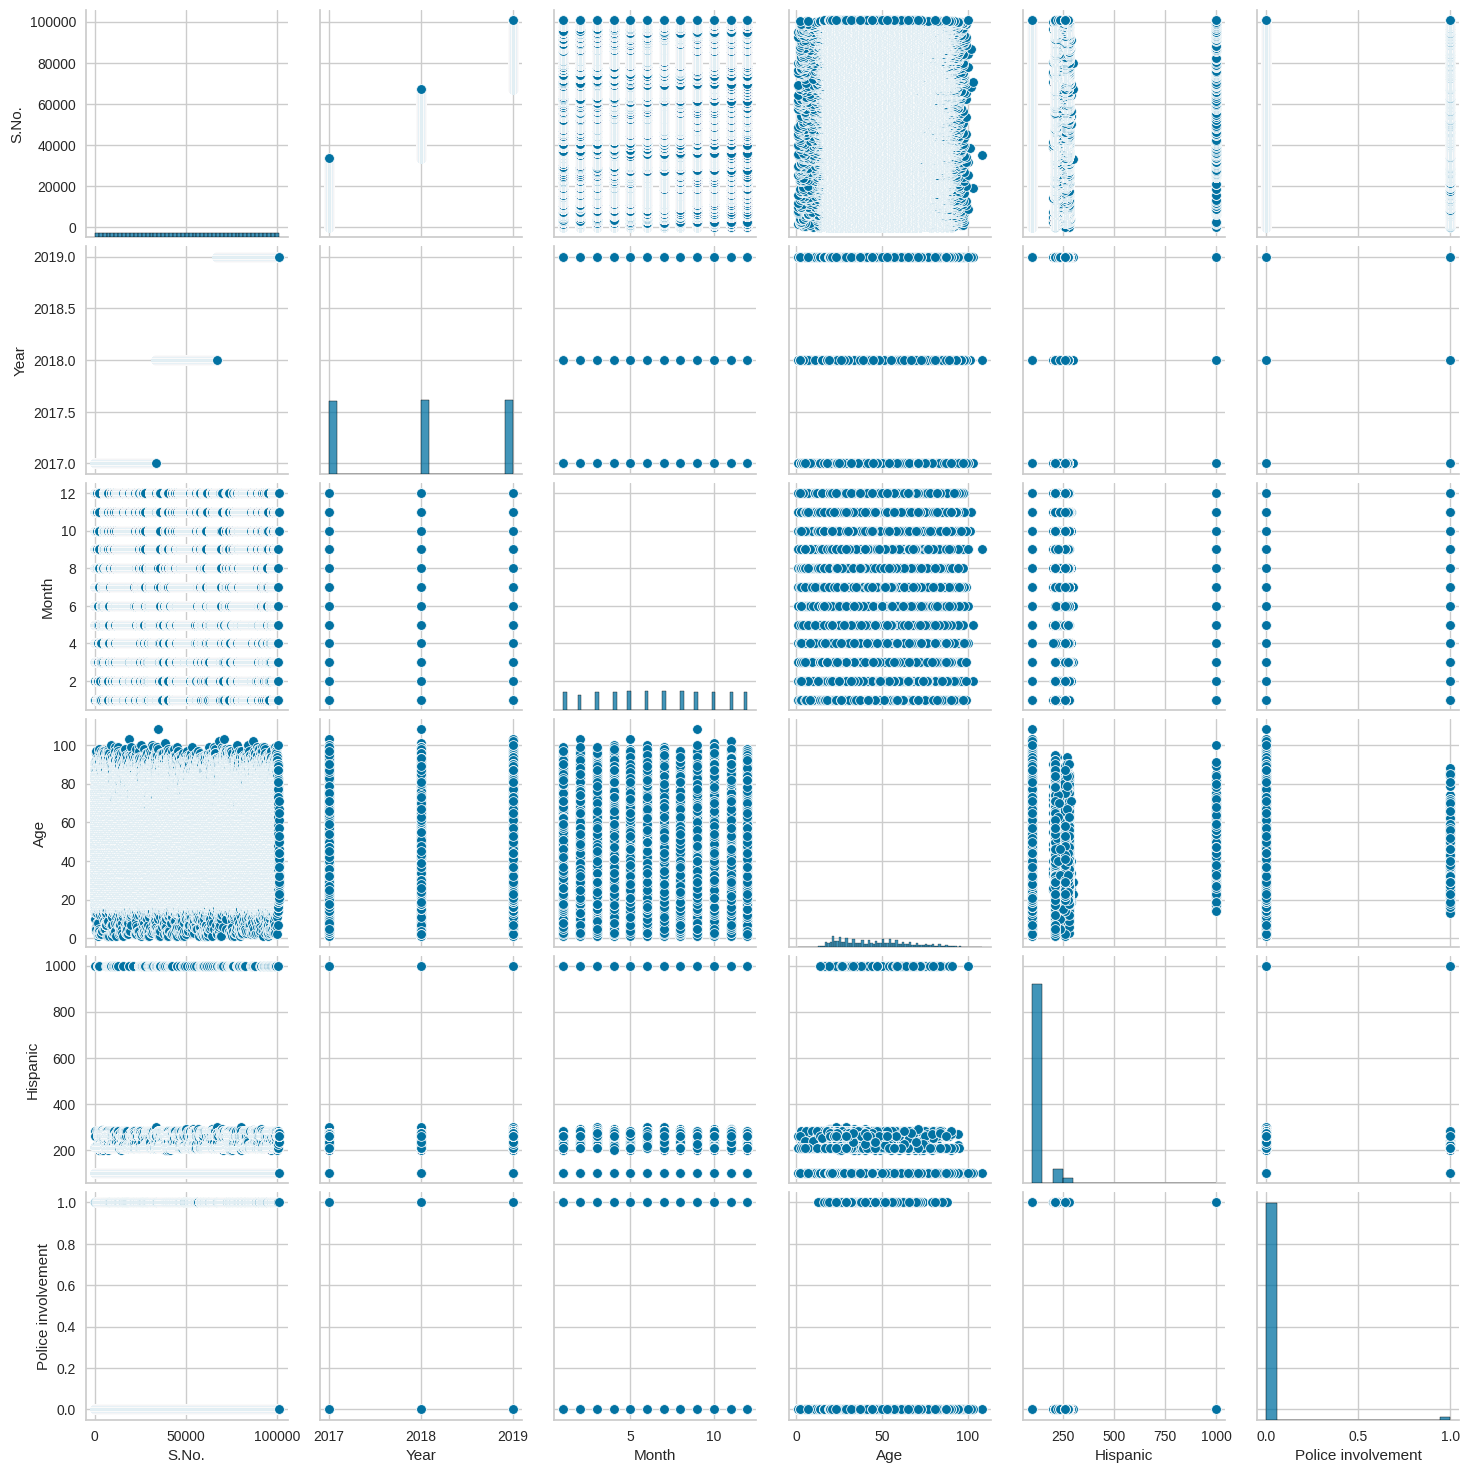

In [79]:
# Pairplot untuk variabel numerik
sns.pairplot(data[numerical_cols])
plt.show()

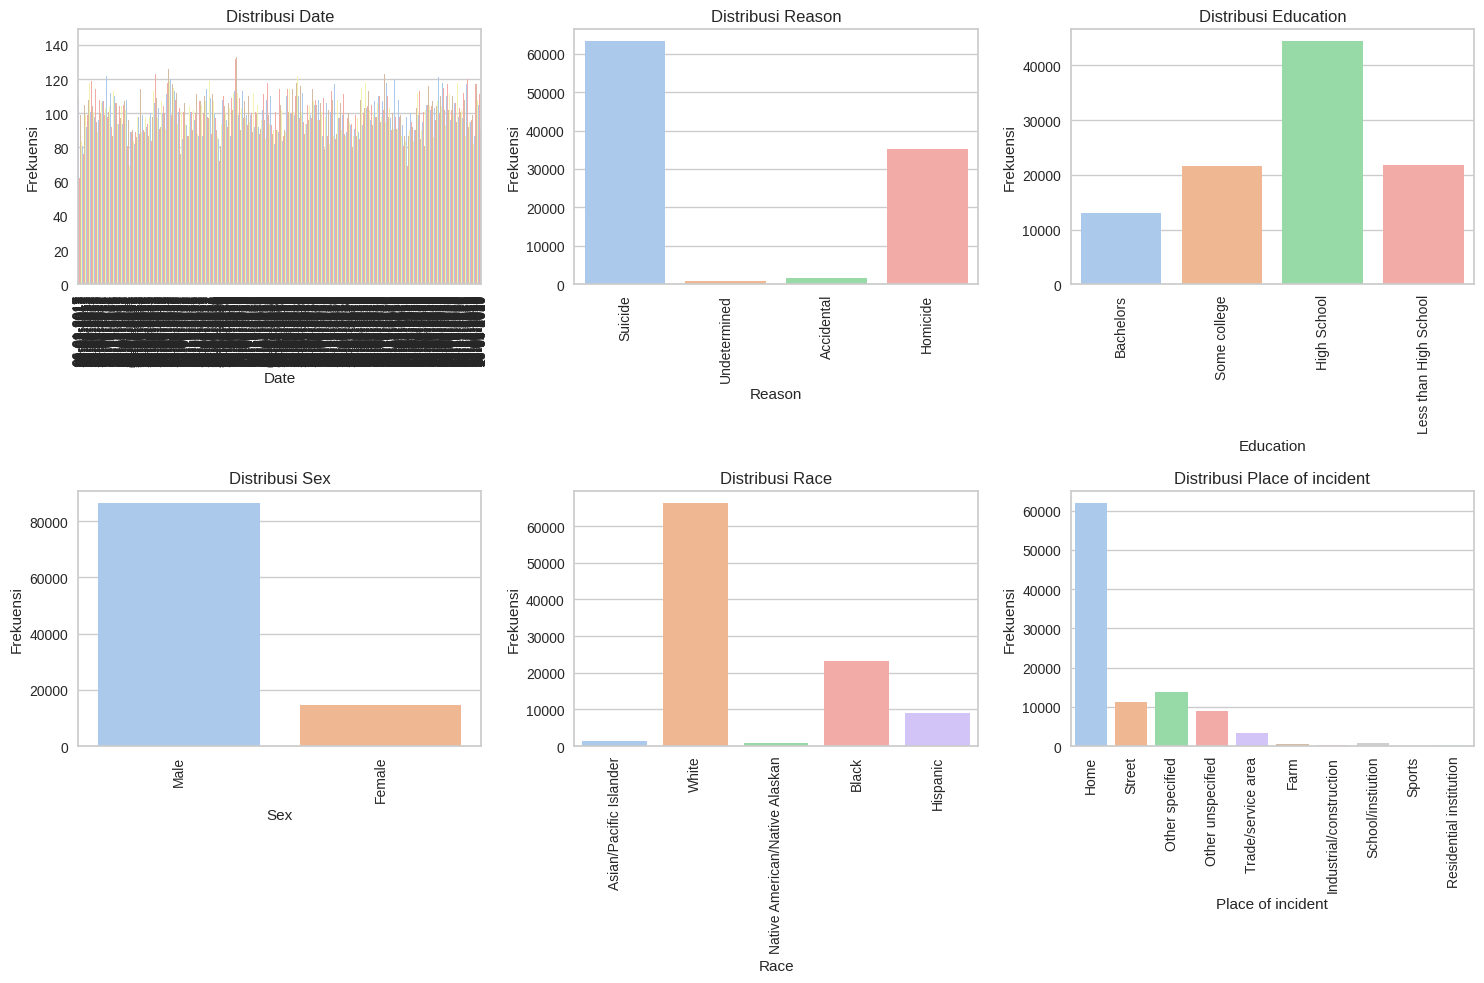

In [80]:
# 4. Visualisasi data
# Visualisasi distribusi kolom kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns

n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plot setiap histogram
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i], hue=col, palette='pastel', legend=False)
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [81]:
# 1. Menghapus atau menangani missing value
print(f"Data sebelum menghapus nilai kosong: {data.shape}")
data = data.dropna()
print(f"Data setelah menghapus nilai kosong: {data.shape}")

Data sebelum menghapus nilai kosong: (100798, 12)
Data setelah menghapus nilai kosong: (100798, 12)


In [82]:
# 2. Menghapus data duplikat
print(f"Jumlah baris duplikat: {data.duplicated().sum()}")

Jumlah baris duplikat: 0


In [115]:
selected_features = [
    'Year', 'Reason', 'Education', 'Sex', 'Age', 'Place of incident', 'Police involvement'
]
data_selected = data[selected_features]
data_selected

,Year,Reason,Education,Sex,Age,Place of incident,Police involvement
0,2017,Suicide,Bachelors,Male,35.0,Home,0
1,2017,Suicide,Some college,Female,22.0,Street,0
2,2017,Suicide,Bachelors,Male,61.0,Other specified,0
3,2017,Suicide,Bachelors,Male,65.0,Home,0
4,2017,Suicide,High School,Male,32.0,Other specified,0
...,...,...,...,...,...,...,...
100793,2019,Homicide,High School,Male,37.0,Home,0
100794,2019,Homicide,High School,Male,20.0,Street,0
100795,2019,Homicide,High School,Male,21.0,Street,0
100796,2019,Homicide,Less than High School,Male,23.0,Street,0


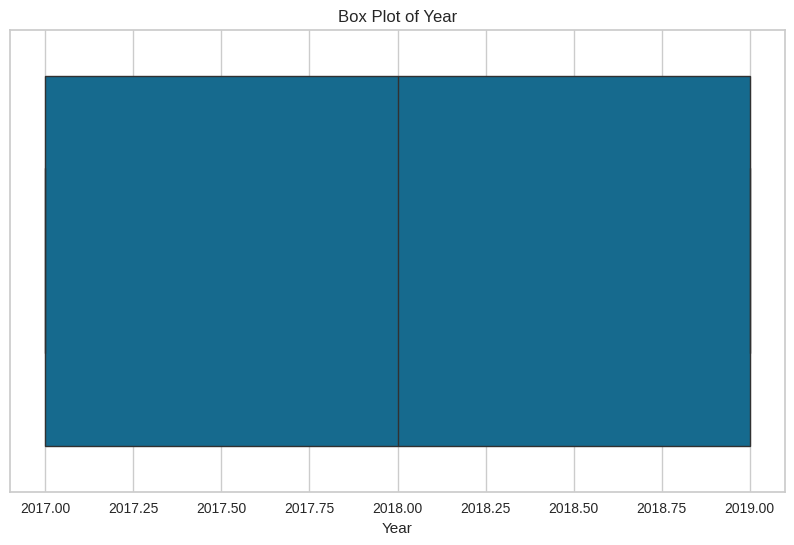

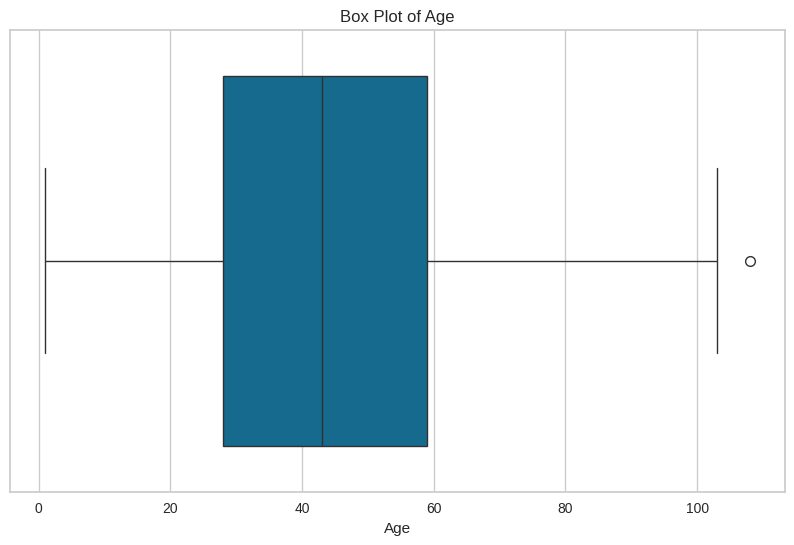

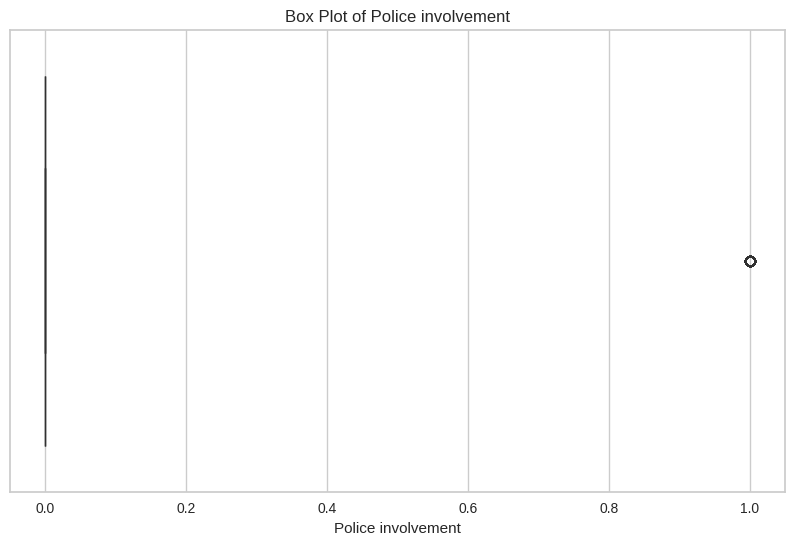

In [104]:
# 3. Deteksi dan tangani outlier
data_numeric = data_selected.select_dtypes(include=['int64', 'float64'])
numeric_features = data_numeric.columns

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_numeric[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

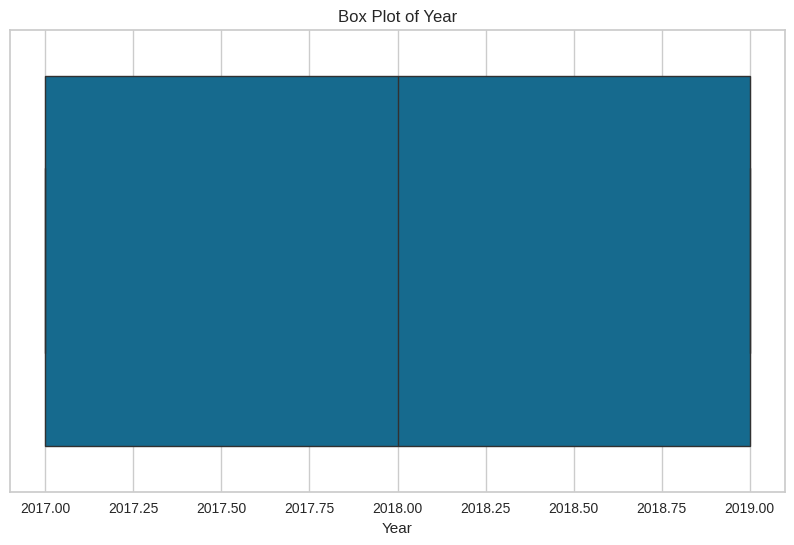

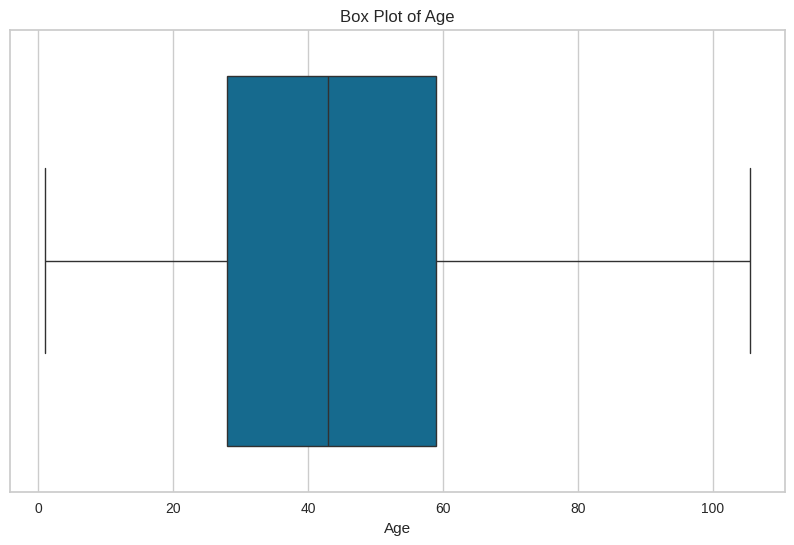

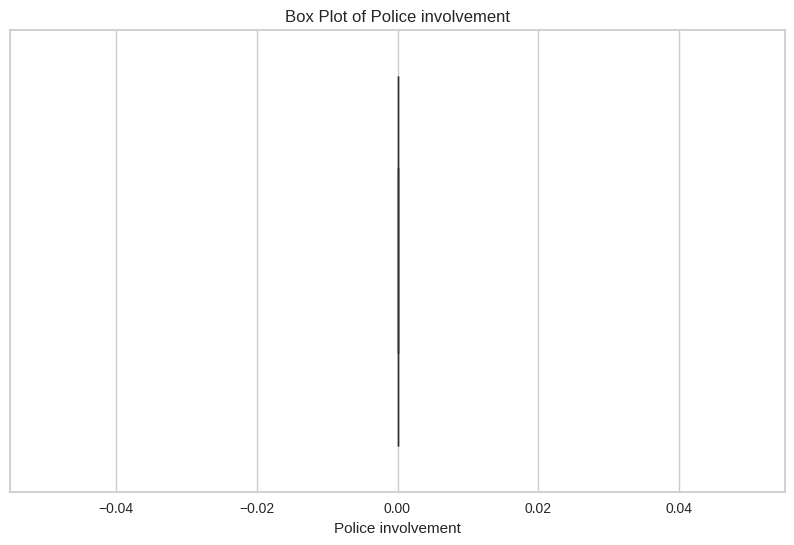

In [105]:
Q1 = data_numeric[numeric_features].quantile(0.25)
Q3 = data_numeric[numeric_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti nilai outlier dengan batas atas/bawah
data_numeric_outlier_removed = data_numeric
for feature in numeric_features:
    data_numeric_outlier_removed[feature] = np.where(data_numeric_outlier_removed[feature] < lower_bound[feature], lower_bound[feature], data_numeric_outlier_removed[feature])
    data_numeric_outlier_removed[feature] = np.where(data_numeric_outlier_removed[feature] > upper_bound[feature], upper_bound[feature], data_numeric_outlier_removed[feature])


for feature in data_numeric_outlier_removed.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_numeric_outlier_removed[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [108]:
# 4. Encode data kategorikal
encoder = LabelEncoder()
data_selected['reason_encoded'] = encoder.fit_transform(data_selected['Reason'])
data_selected['education_encoded'] = encoder.fit_transform(data_selected['Education'])
data_selected['place_encoded'] = encoder.fit_transform(data_selected['Place of incident'])
data_selected['sex_encoded'] = encoder.fit_transform(data_selected['Sex'])

data_selected.drop(['Reason', 'Education', 'Place of incident', 'Sex'], axis=1, inplace=True)
data_selected

<ipython-input-108-84036bfcec4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['reason_encoded'] = encoder.fit_transform(data_selected['Reason'])
<ipython-input-108-84036bfcec4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['education_encoded'] = encoder.fit_transform(data_selected['Education'])
<ipython-input-108-84036bfcec4c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Year,Age,Police involvement,reason_encoded,education_encoded,place_encoded,sex_encoded
0,2017,35.0,0,2,0,1,1
1,2017,22.0,0,2,3,8,0
2,2017,61.0,0,2,0,3,1
3,2017,65.0,0,2,0,1,1
4,2017,32.0,0,2,1,3,1
...,...,...,...,...,...,...,...
100793,2019,37.0,0,1,1,1,1
100794,2019,20.0,0,1,1,8,1
100795,2019,21.0,0,1,1,8,1
100796,2019,23.0,0,1,2,8,1


In [111]:
# 5. Normalisasi / Standarisasi

scaler = StandardScaler()
data_scaler_values = scaler.fit_transform(data_selected)
data_scaler = pd.DataFrame(data_scaler_values, columns=data_selected.columns)
data_scaler

,Year,Age,Police involvement,reason_encoded,education_encoded,place_encoded,sex_encoded
0,-1.225517,-0.505647,-0.118765,0.702624,-1.568691,-0.638023,0.409063
1,-1.225517,-1.172507,-0.118765,0.702624,1.531010,2.100550,-2.444611
2,-1.225517,0.828072,-0.118765,0.702624,-1.568691,0.144426,0.409063
3,-1.225517,1.033259,-0.118765,0.702624,-1.568691,-0.638023,0.409063
4,-1.225517,-0.659538,-0.118765,0.702624,-0.535457,0.144426,0.409063
...,...,...,...,...,...,...,...
100793,1.224642,-0.403053,-0.118765,-1.178667,-0.535457,-0.638023,0.409063
100794,1.224642,-1.275101,-0.118765,-1.178667,-0.535457,2.100550,0.409063
100795,1.224642,-1.223804,-0.118765,-1.178667,-0.535457,2.100550,0.409063
100796,1.224642,-1.121210,-0.118765,-1.178667,0.497776,2.100550,0.409063


In [112]:
# Calculate the correlation matrix
correlation_matrix = data_scaler.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features
df_selected = data_scaler.drop(columns=to_drop)
df_selected

,Year,Age,Police involvement,reason_encoded,education_encoded,place_encoded,sex_encoded
0,-1.225517,-0.505647,-0.118765,0.702624,-1.568691,-0.638023,0.409063
1,-1.225517,-1.172507,-0.118765,0.702624,1.531010,2.100550,-2.444611
2,-1.225517,0.828072,-0.118765,0.702624,-1.568691,0.144426,0.409063
3,-1.225517,1.033259,-0.118765,0.702624,-1.568691,-0.638023,0.409063
4,-1.225517,-0.659538,-0.118765,0.702624,-0.535457,0.144426,0.409063
...,...,...,...,...,...,...,...
100793,1.224642,-0.403053,-0.118765,-1.178667,-0.535457,-0.638023,0.409063
100794,1.224642,-1.275101,-0.118765,-1.178667,-0.535457,2.100550,0.409063
100795,1.224642,-1.223804,-0.118765,-1.178667,-0.535457,2.100550,0.409063
100796,1.224642,-1.121210,-0.118765,-1.178667,0.497776,2.100550,0.409063


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [95]:
# Inisialisasi K-Means
def algoritma_kmeans(data_selected, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_kmeans = kmeans.fit_predict(data_selected)
    return cluster_labels_kmeans, kmeans


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [91]:
# Fungsi untuk visualisasi berdampingan
def plot_side_by_side(df_selected, titles, figsize=(18, 6)):
    fig, axes = plt.subplots(1, len(df_selected), figsize=figsize)
    for ax, d, title in zip(axes, df_selected, titles):
        ax.plot(d['x'], d['y'], marker='o', linestyle=d.get('linestyle', '-'), color=d.get('color', 'blue'))
        ax.set_title(title)
        ax.set_xlabel(d.get('xlabel', ''))
        ax.set_ylabel(d.get('ylabel', ''))
        ax.grid(True)
    plt.tight_layout()
    plt.show()

# Range untuk jumlah cluster
range_clusters = range(2, 5)

# Placeholder untuk menyimpan Silhouette Score
silhouette_scores_kmeans = []

# KMeans: Elbow Method dan Silhouette Score
inertia = []

for k in range_clusters:
    cluster_labels_kmeans, kmeans_model = algoritma_kmeans(df_selected, k)

    # Hitung Silhouette Score
    silhouette_avg_kmeans = silhouette_score(df_selected, cluster_labels_kmeans)
    inertia.append(kmeans_model.inertia_)
    silhouette_scores_kmeans.append(silhouette_avg_kmeans)
    print(f'Jumlah Klaster (KMeans): {k}, Silhouette Score: {silhouette_avg_kmeans:.4f}')

# Optimal cluster untuk KMeans
optimal_k_kmeans = range_clusters[silhouette_scores_kmeans.index(max(silhouette_scores_kmeans))]

# Output hasil evaluasi
print(f"Optimal K (KMeans): {optimal_k_kmeans}")

Jumlah Klaster (KMeans): 2, Silhouette Score: 0.6410
Jumlah Klaster (KMeans): 3, Silhouette Score: 0.2363
Jumlah Klaster (KMeans): 4, Silhouette Score: 0.2135
Optimal K (KMeans): 2


In [96]:
# 1. Reduksi Dimensi dengan PCA
n_components = 2
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_selected)

# 2. Klasterisasi dengan data PCA (KMeans)
silhouette_scores_pca_kmeans = []
for k in range_clusters:
    cluster_labels_pca_kmeans, _ = algoritma_kmeans(df_pca, k)
    silhouette_avg_pca_kmeans = silhouette_score(df_pca, cluster_labels_pca_kmeans)
    silhouette_scores_pca_kmeans.append(silhouette_avg_pca_kmeans)
    print(f'KMeans PCA - Jumlah Klaster: {k}, Silhouette Score: {silhouette_avg_pca_kmeans:.4f}')

# Optimal cluster untuk KMeans dengan PCA
optimal_k_pca_kmeans = range_clusters[silhouette_scores_pca_kmeans.index(max(silhouette_scores_pca_kmeans))]

# Output hasil evaluasi setelah PCA
print(f"Optimal K (KMeans PCA): {optimal_k_pca_kmeans}")

# Output hasil evaluasi
print(f"Optimal K (KMeans): {optimal_k_pca_kmeans}")

KMeans PCA - Jumlah Klaster: 2, Silhouette Score: 0.4818
KMeans PCA - Jumlah Klaster: 3, Silhouette Score: 0.5100
KMeans PCA - Jumlah Klaster: 4, Silhouette Score: 0.4276
Optimal K (KMeans PCA): 3
Optimal K (KMeans): 3


In [125]:
cluster_labels_optimal, _ = algoritma_kmeans(df_selected, optimal_k_kmeans)

# Perbarui kolom 'Cluster' dengan hasil dari klaster optimal
df_selected['Cluster'] = cluster_labels_optimal

# Output jumlah klaster yang terisi dalam kolom 'Cluster'
print("Cluster assignment for optimal K:")

print(df_selected['Cluster'].value_counts())

Cluster assignment for optimal K:
Cluster
1    63088
0    37710
Name: count, dtype: int64


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [126]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


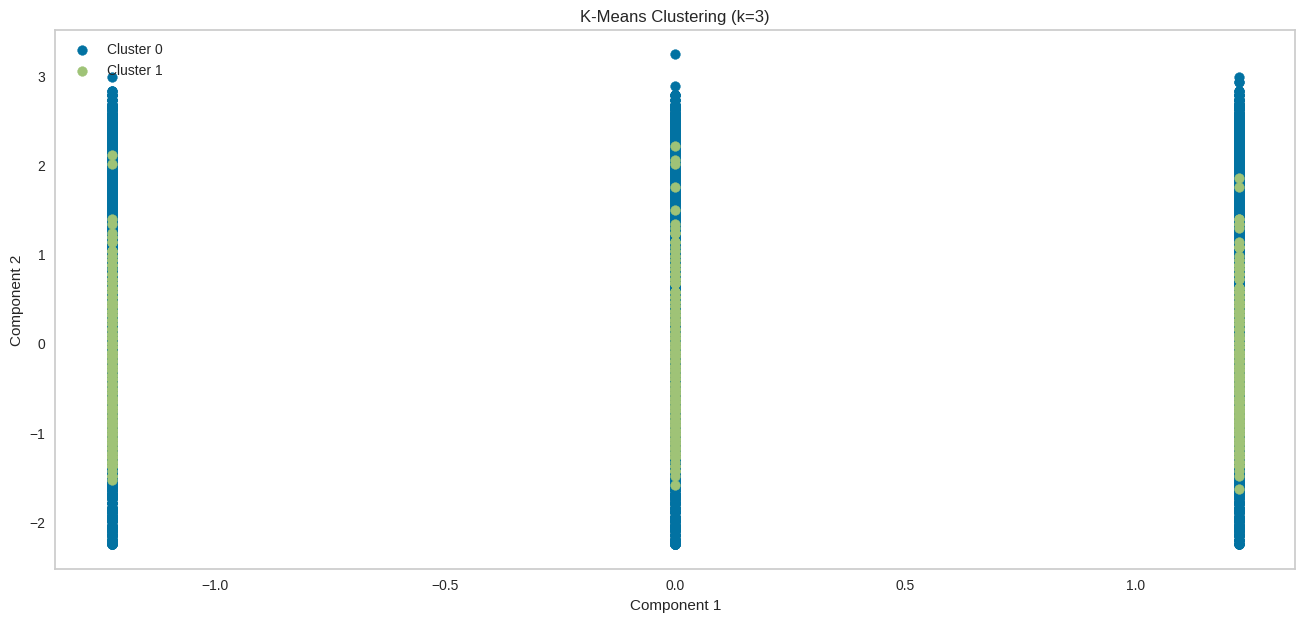

In [98]:
fig, ax = plt.subplots(figsize=(16, 7))

for cluster in range(optimal_k_kmeans):
    cluster_data = df_selected[df_selected['Cluster'] == cluster]

    # Use ax directly for plotting
    ax.scatter(cluster_data.iloc[:, 0],
                cluster_data.iloc[:, 1],
                label=f'Cluster {cluster}')

ax.set_title(f"K-Means Clustering (k={optimal_k_pca_kmeans})")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
ax.grid()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [124]:
# Menghitung rata-rata dan median untuk setiap cluster
cluster_summary = data_selected.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'max', 'min'],
    'Year': ['mean', 'median', 'max', 'min'],
    'Reason': lambda x: x.mode()[0],  # Merek paling umum
    'Sex': lambda x: x.mode()[0],   # Bahan bakar paling umum
    'Place of incident': lambda x: x.mode()[0],   # Bahan bakar paling umum
    'Police involvement': lambda x: x.mode()[0],   # Bahan bakar paling umum
}).reset_index()

print(cluster_summary)

  Cluster        Age                            Year                      \
                mean median    max  min         mean  median   max   min   
0       0  32.497693   30.0   97.0  1.0  2017.980509  2018.0  2019  2017   
1       1  52.245039   53.0  108.0  4.0  2018.012221  2018.0  2019  2017   

     Reason      Sex Place of incident Police involvement  
   <lambda> <lambda>          <lambda>           <lambda>  
0  Homicide     Male              Home                  0  
1   Suicide     Male              Home                  0  


Tulis hasil interpretasinya di sini.
1. Cluster 0:
Rata-rata umur: 32.497 (32~33) tahun
Rata-rata Tahun tragedi: 2017
Alasan: Pembunuhan
Jenis Kelamin: Laki-laki
Tempat kejadian: Rumah
Keterlibatan Polisi: Tidak ada

Interpretasi: Dari hasil Cluster 0, ditunjukkan bahwa pada akhir tahun 2017 terjadi paling banyak kasus penembakan dengan alasan pembunuhan. Korban pembunuhan paling banyak terjadi pada laki-laki. Tragedi terjadi di rumah korban. Tidak ada keterlibatan polisi di sini

2. Cluster 1:
Rata-rata umur: 52.245 tahun
Tahun tragedi: 2018
Alasan: Bunuh diri
Jenis Kelamin: Laki-Laki
Tempat kejadian: Rumah
Keterlibatan Polisi: Tidak ada

Interpretasi: Dari hasil Cluster 1, ditunjukkan bahwa pada tahun 2018 terjadi paling banyak kasus penembakan dengan alasan bunuh diri. Korban pembunuhan paling banyak terjadi pada laki-laki. Tragedi terjadi di rumah korban. Tidak ada keterlibatan polisi di sini



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Usia:** 32.497 (33 tahun)
- **Rata-rata Tahun:** 2017.980 (akhir tahun 2017)
- **Jenis Kelamin:** Laki-Laki
- **Alasan:** Pembunuhan
- **Tempat Kejadian Perkara:** Rumah Korban
- **Keterlibatan Polisi:** Tidak ada
- **Analisis:** Data menunjukkan bahwa mayoritas pelaku pembunuhan dalam cluster ini adalah laki-laki dengan rata-rata usia sekitar 33 tahun. Kejadian banyak terjadi di akhir tahun 2017 dengan lokasi utama di rumah korban. Hal ini mengindikasikan bahwa kasus-kasus ini kemungkinan besar melibatkan konflik domestik atau hubungan personal antara pelaku dan korban, bukan sekadar kejahatan acak. Fakta bahwa keterlibatan polisi tidak ditemukan dalam data ini juga cukup mengkhawatirkan, karena bisa jadi banyak kasus tidak terlaporkan atau baru diketahui setelah waktu yang cukup lama. Selain itu, angka rata-rata usia pelaku juga mencerminkan bahwa mereka berada dalam fase kehidupan yang cukup rentan terhadap tekanan sosial dan ekonomi, yang mungkin menjadi pemicu utama tindakan kriminal.

**Saran**

Untuk mengatasi pola ini, perlu ada peningkatan kesadaran masyarakat terhadap keamanan domestik, terutama dalam mengidentifikasi tanda-tanda awal konflik yang bisa berujung pada tindak kekerasan. Kampanye edukasi terkait pengendalian emosi dan penyelesaian konflik secara damai juga penting untuk mencegah kasus serupa di masa depan. Sistem pelaporan yang lebih mudah dan anonim bisa membantu meningkatkan keterlibatan pihak berwenang dalam menangani potensi kejahatan sebelum semakin parah. Selain itu, pemasangan sistem keamanan di lingkungan tempat tinggal, seperti CCTV dan program patroli komunitas, dapat membantu mengurangi risiko kejahatan di rumah korban. Lebih jauh, analisis lebih dalam mengenai motif pembunuhan dapat memberikan wawasan tambahan dalam menyusun strategi pencegahan yang lebih efektif.

## Cluster 1:
- **Rata-rata Usia:** 52.245 (52 tahun)
- **Rata-rata Tahun:** 2018
- **Jenis Kelamin:** Laki-Laki
- **Alasan:** Bunuh diri
- **Tempat Kejadian Perkara:** Rumah Korban
- **Keterlibatan Polisi:** Tidak ada
- **Analisis:** Data ini menunjukkan bahwa mayoritas individu dalam cluster ini adalah laki-laki berusia sekitar 52 tahun dengan motif utama bunuh diri, terjadi di rumah korban pada tahun 2018. Usia paruh baya sering dikaitkan dengan tekanan sosial, kesepian, atau masalah finansial yang bisa menjadi pemicu utama. Kejadian di rumah korban menunjukkan bahwa tindakan ini dilakukan dalam lingkungan pribadi, kemungkinan tanpa dukungan mental yang memadai. Tidak adanya keterlibatan polisi bisa mengindikasikan stigma sosial atau kurangnya mekanisme pelaporan.

**Saran**

Untuk mengatasi pola ini, penting meningkatkan kesadaran kesehatan mental bagi kelompok usia ini melalui layanan konseling, kelompok dukungan, dan edukasi masyarakat. Kampanye terbuka tentang kesehatan mental dapat mengurangi stigma dan mendorong individu mencari bantuan sebelum terlambat. Sistem deteksi dini melalui komunitas dan tenaga medis juga perlu diperkuat untuk mengidentifikasi tanda-tanda depresi berat. Dengan memastikan akses mudah ke layanan bantuan dan membangun lingkungan yang lebih peduli, angka kasus serupa dapat ditekan.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [123]:
df_selected.to_csv('Guns_clustering.csv', index=False)
print("Data hasil clustering telah berhasil diekspor ke 'Guns_clustering.csv'")

Data hasil clustering telah berhasil diekspor ke 'Guns_clustering.csv'
